In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from pandas import datetime

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
import random
def parser(x):
    year = random.randint(1990, 2000)
    month = random.randint(1, 12)
    day = random.randint(1, 28)
    return datetime(year, month, day)    
#Read the csv file and parse the date    
df = pd.read_csv('C:\DataScience\data_stocks.csv', header=0, parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)
#df = pd.read_csv('C:\DataScience\data_stocks.csv')

df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1998-04-22,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1992-10-12,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2000-05-10,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1993-03-13,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1996-11-19,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [53]:
#Stocks to forecast:
#1. NASDAQ.AAPL
#2. NASDAQ.ADP
#3. NASDAQ.CBOE
#4. NASDAQ.CSCO
#5. NASDAQ.EBAY
df.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [32]:
#Checking if any null values in values of the stock
df["NASDAQ.AAPL"]
df.isnull().values.any()
df[df.isnull().any(axis=1)]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,


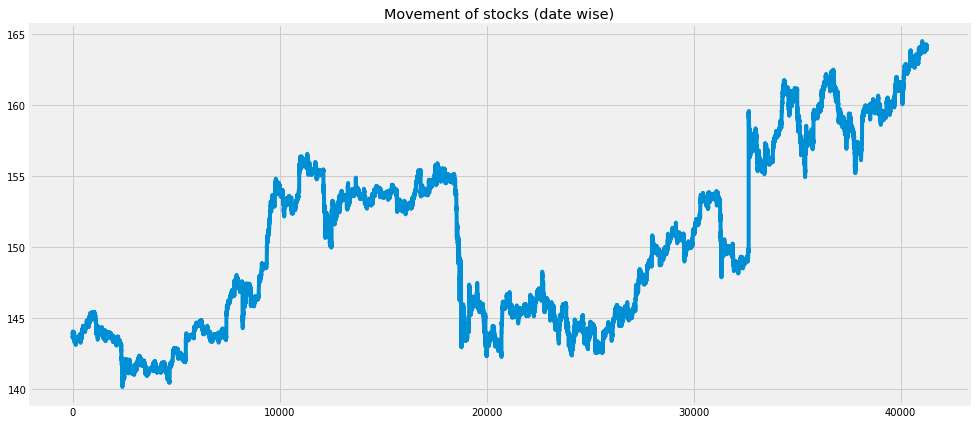

In [47]:
#Plot the movement of stock of NASDAQ.AAPL
plt.figure(figsize=(15, 7))
plt.plot(df["NASDAQ.AAPL"])
plt.title('Movement of stocks (date wise)')
plt.grid(True)
plt.show()

In [48]:
series = df[["NASDAQ.AAPL"]]
series.describe()
# Dimensions of dataset
n = series.shape[0]
p = series.shape[1]
# Make data a numpy array
data = series.values
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

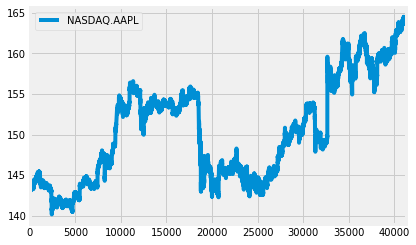

In [49]:
data_train.mean()
# show plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
series.plot()
plt.show()

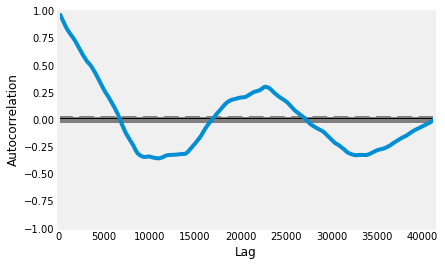

In [42]:
#Auto correlate the plot to smoothen the time series pattern
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood               39230.690
Method:                       css-mle   S.D. of innovations              0.094
Date:                Tue, 01 Jan 2019   AIC                         -78447.380
Time:                        22:34:36   BIC                         -78386.985
Sample:                    06-03-1998   HQIC                        -78428.291
                         - 03-26-1991                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.000      1.113      0.266      -0.000       0.001
ar.L1.D.NASDAQ.AAPL    -0.0102      0.005     -2.082      0.037      -0.020      -0.001
ar.L2.D.NASDAQ.A

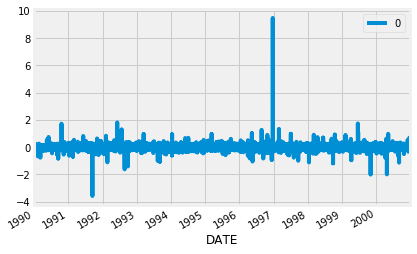

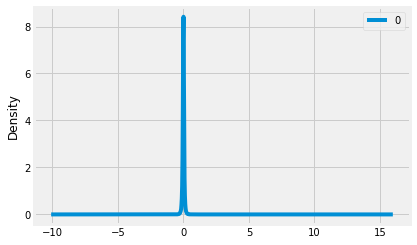

                  0
count  4.126500e+04
mean   1.892116e-08
std    9.351553e-02
min   -3.574548e+00
25%   -3.101367e-02
50%    7.835734e-05
75%    3.138983e-02
max    9.464882e+00


In [58]:
from pandas import DataFrame

#fit the model for the Stock movement of NASDAQ.AAPL

series = df[["NASDAQ.AAPL"]]
pd.to_datetime(series.index)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())


In [62]:
#Forecast for the future values using the model
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=147.128863, expected=147.129900
predicted=147.134310, expected=146.910000
predicted=146.908469, expected=146.960000
predicted=146.967670, expected=146.960000
predicted=146.957288, expected=146.920000


KeyboardInterrupt: 

KeyboardInterrupt: 

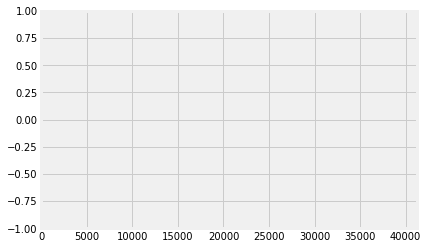

In [63]:
#fit the model for the Stock movement of NASDAQ.ADP
series = df[["NASDAQ.ADP"]]
series.describe()
#keep test data of 1903
# Dimensions of dataset
n = series.shape[0]
p = series.shape[1]
# Make data a numpy array
data = series.values
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()
from pandas import DataFrame

#fit the model for the Stock movement of NASDAQ.ADP
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
series = df[["NASDAQ.CBOE"]]
series.describe()
#keep test data of 1903
# Dimensions of dataset
n = series.shape[0]
p = series.shape[1]
# Make data a numpy array
data = series.values
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()
from pandas import DataFrame

#fit the model for the Stock movement ofNASDAQ.CBOE
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
series = df[["NASDAQ.CSCO"]]
series.describe()

# Dimensions of dataset
n = series.shape[0]
p = series.shape[1]
# Make data a numpy array
data = series.values
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()
from pandas import DataFrame

#fit the model for the stick NASDAQ.CSCO
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
series = df[["NASDAQ.EBAY"]]
series.describe()

# Dimensions of dataset
n = series.shape[0]
p = series.shape[1]
# Make data a numpy array
data = series.values
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()
from pandas import DataFrame

#fit the model for the stock NASDAQ.EBAY
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()